# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#List to store values
Lat = 0
Lng = 0
Max_Temp = 0
Humidity = 0
Cloudiness = 0
Wind_Speed = 0
Country = ""
Date = ""

City_Weather_df= pd.DataFrame({"City": cities,
                               "Lat": Lat,
                               "Lng": Lng,
                               "Max Temp": Max_Temp,
                               "Humidity": Humidity,
                               "Cloudiness": Cloudiness,
                               "Wind Speed": Wind_Speed,
                               "Country": Country,
                               "Date": Date})

#Loop through cities 
#Incorporate a try-except to skip any cities that are missing a data point.

print(f"Beginning Data Retrieval")
print(f"-----------------------------")
    
for index in range(len(City_Weather_df)):
    city=City_Weather_df.loc[index, "City"]
    #URL to query the api data
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    response = requests.get(query_url).json()
        
    try: 
        print(f"Processing Record {index}: {response['name']}")
        City_Weather_df.loc[index, "City"] = response ["name"]
        City_Weather_df.loc[index, "Lat"] = response ["coord"]["lat"]
        City_Weather_df.loc[index, "Lng"] = response ["coord"]["lon"]
        City_Weather_df.loc[index, "Max_Temp"] = response ["main"]["temp_max"]
        City_Weather_df.loc[index, "Humidity"] = response ["main"]["humidity"]
        City_Weather_df.loc[index, "Cloudiness "] = response ["clouds"]["all"]
        City_Weather_df.loc[index, "Wind_Speed"] = response ["wind"]["speed"]
        City_Weather_df.loc[index, "Country"] = response ["sys"]["country"]
        City_Weather_df.loc[index, "Date"] = response ["dt"]
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")


Beginning Data Retrieval
-----------------------------
Processing Record 0: Hilo
City not found. Skipping...
Processing Record 2: Butaritari
Processing Record 3: Qasigiannguit
City not found. Skipping...
Processing Record 5: Punta Arenas
Processing Record 6: Ushuaia
Processing Record 7: Faanui
Processing Record 8: Narsaq
Processing Record 9: Hobart
City not found. Skipping...
Processing Record 11: Meadow Lake
Processing Record 12: Tirat Carmel
Processing Record 13: Mahajanga
Processing Record 14: Yamethin
Processing Record 15: Castro
Processing Record 16: Hithadhoo
Processing Record 17: Kapaa
Processing Record 18: Tasiilaq
Processing Record 19: Grindavik
Processing Record 20: Avarua
Processing Record 21: George Town
Processing Record 22: Harper
Processing Record 23: Beringovskiy
Processing Record 24: Khatanga
Processing Record 25: Dunedin
Processing Record 26: Kirakira
Processing Record 27: Tuktoyaktuk
Processing Record 28: Vaini
Processing Record 29: Barrow
Processing Record 30: James

Processing Record 255: Tatarsk
Processing Record 256: Maumere
Processing Record 257: Mombaça
Processing Record 258: Bayan
Processing Record 259: Jinotega
Processing Record 260: Great Yarmouth
Processing Record 261: Hancheng
Processing Record 262: Saint George
Processing Record 263: Kiama
Processing Record 264: Zlobin
Processing Record 265: Medina
Processing Record 266: Vila Franca do Campo
City not found. Skipping...
Processing Record 268: Jiuquan
Processing Record 269: Anantapur
Processing Record 270: Bandarbeyla
City not found. Skipping...
Processing Record 272: Waipawa
Processing Record 273: Benguela
Processing Record 274: Havøysund
Processing Record 275: Ust-Nera
Processing Record 276: Mandera
Processing Record 277: Hrubieszów
Processing Record 278: Chumikan
City not found. Skipping...
Processing Record 280: Mawlaik
Processing Record 281: Zile
City not found. Skipping...
Processing Record 283: Tefé
Processing Record 284: Tautira
Processing Record 285: Quelimane
Processing Record 28

Processing Record 515: Brits
Processing Record 516: Loandjili
Processing Record 517: Fjerritslev
Processing Record 518: Ust-Maya
Processing Record 519: Mishelevka
Processing Record 520: Kaeo
Processing Record 521: Iskateley
Processing Record 522: Kango
Processing Record 523: Marrakesh
Processing Record 524: Atambua
Processing Record 525: Hūn
Processing Record 526: Kenai
Processing Record 527: Kumul
Processing Record 528: Saint-Leu
Processing Record 529: Dūkštas
Processing Record 530: Diapaga
Processing Record 531: Hihyā
Processing Record 532: Coos Bay
Processing Record 533: Xingcheng
Processing Record 534: Soverato Marina
Processing Record 535: Kathmandu
Processing Record 536: Ngunguru
Processing Record 537: Teya
Processing Record 538: Maridi
Processing Record 539: Shelburne
Processing Record 540: Raudeberg
Processing Record 541: Watertown
Processing Record 542: Gushikawa
Processing Record 543: Sydney
Processing Record 544: Altamont
Processing Record 545: Mahon
Processing Record 546: B

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Export the file into a .csv
City_Weather_df.to_csv("City_Weather.csv", encoding="utf-8", index=False)

In [8]:
City_Weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max_Temp,Cloudiness,Wind_Speed
0,Hilo,19.7297,-155.0900,0,91,0,0,US,1634954331,75.40,90.0,11.50
1,taolanaro,0.0000,0.0000,0,0,0,0,,,NaN,NaN,NaN
2,Butaritari,3.0707,172.7902,0,78,0,0,KI,1634954511,82.27,77.0,18.57
3,Qasigiannguit,68.8193,-51.1922,0,75,0,0,GL,1634954633,19.65,55.0,7.18
4,barentsburg,0.0000,0.0000,0,0,0,0,,,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
602,Starogard Gdański,53.9640,18.5264,0,100,0,0,PL,1634954756,45.05,72.0,17.31
603,Kattivākkam,13.2167,80.3167,0,75,0,0,IN,1634954756,82.49,56.0,5.66
604,Sinazongwe,-17.2614,27.4618,0,50,0,0,ZM,1634954757,77.22,14.0,2.39
605,Yabrūd,33.9674,36.6574,0,60,0,0,SY,1634954757,46.53,1.0,4.38


In [9]:
City_Weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Max_Temp,Cloudiness,Wind_Speed
count,607.000000,607.000000,607.0,607.000000,607.0,607.0,560.000000,560.000000,560.000000
mean,18.199786,15.311591,0.0,66.789127,0.0,0.0,59.282107,57.432143,7.847321
std,32.363807,87.455095,0.0,26.388973,0.0,0.0,20.034480,40.648179,5.920655
min,-54.800000,-179.166700,0.0,0.000000,0.0,0.0,-13.470000,0.000000,0.000000
25%,-5.704900,-58.426950,0.0,57.000000,0.0,0.0,46.702500,11.000000,3.485000
50%,18.736900,13.840000,0.0,74.000000,0.0,0.0,62.275000,75.000000,6.355000
75%,44.064350,90.027000,0.0,86.000000,0.0,0.0,75.525000,98.250000,11.360000
max,78.218600,179.316700,0.0,100.000000,0.0,0.0,94.980000,100.000000,35.680000


In [12]:
#Remove cities with missing data
remove_city_data = City_Weather_df[(City_Weather_df["Lat"] != 0)] 
remove_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max_Temp,Cloudiness,Wind_Speed
0,Hilo,19.7297,-155.0900,0,91,0,0,US,1634954331,75.40,90.0,11.50
2,Butaritari,3.0707,172.7902,0,78,0,0,KI,1634954511,82.27,77.0,18.57
3,Qasigiannguit,68.8193,-51.1922,0,75,0,0,GL,1634954633,19.65,55.0,7.18
5,Punta Arenas,-53.1500,-70.9167,0,81,0,0,CL,1634954391,39.31,75.0,35.68
6,Ushuaia,-54.8000,-68.3000,0,75,0,0,AR,1634954254,40.66,75.0,12.66
...,...,...,...,...,...,...,...,...,...,...,...,...
602,Starogard Gdański,53.9640,18.5264,0,100,0,0,PL,1634954756,45.05,72.0,17.31
603,Kattivākkam,13.2167,80.3167,0,75,0,0,IN,1634954756,82.49,56.0,5.66
604,Sinazongwe,-17.2614,27.4618,0,50,0,0,ZM,1634954757,77.22,14.0,2.39
605,Yabrūd,33.9674,36.6574,0,60,0,0,SY,1634954757,46.53,1.0,4.38


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
clean_city_data = remove_city_data[(remove_city_data["Humidity"] <=100)]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max_Temp,Cloudiness,Wind_Speed
0,Hilo,19.7297,-155.0900,0,91,0,0,US,1634954331,75.40,90.0,11.50
2,Butaritari,3.0707,172.7902,0,78,0,0,KI,1634954511,82.27,77.0,18.57
3,Qasigiannguit,68.8193,-51.1922,0,75,0,0,GL,1634954633,19.65,55.0,7.18
5,Punta Arenas,-53.1500,-70.9167,0,81,0,0,CL,1634954391,39.31,75.0,35.68
6,Ushuaia,-54.8000,-68.3000,0,75,0,0,AR,1634954254,40.66,75.0,12.66
...,...,...,...,...,...,...,...,...,...,...,...,...
602,Starogard Gdański,53.9640,18.5264,0,100,0,0,PL,1634954756,45.05,72.0,17.31
603,Kattivākkam,13.2167,80.3167,0,75,0,0,IN,1634954756,82.49,56.0,5.66
604,Sinazongwe,-17.2614,27.4618,0,50,0,0,ZM,1634954757,77.22,14.0,2.39
605,Yabrūd,33.9674,36.6574,0,60,0,0,SY,1634954757,46.53,1.0,4.38


In [14]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Max_Temp,Cloudiness,Wind_Speed
count,560.000000,560.000000,560.0,560.000000,560.0,560.0,560.000000,560.000000,560.000000
mean,19.727269,16.596671,0.0,72.394643,0.0,0.0,59.282107,57.432143,7.847321
std,33.245969,90.940060,0.0,18.665293,0.0,0.0,20.034480,40.648179,5.920655
min,-54.800000,-179.166700,0.0,15.000000,0.0,0.0,-13.470000,0.000000,0.000000
25%,-8.375425,-63.147175,0.0,62.000000,0.0,0.0,46.702500,11.000000,3.485000
50%,24.050000,19.735850,0.0,76.000000,0.0,0.0,62.275000,75.000000,6.355000
75%,46.490850,96.205000,0.0,86.000000,0.0,0.0,75.525000,98.250000,11.360000
max,78.218600,179.316700,0.0,100.000000,0.0,0.0,94.980000,100.000000,35.680000


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data.to_csv("cleancitydata.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

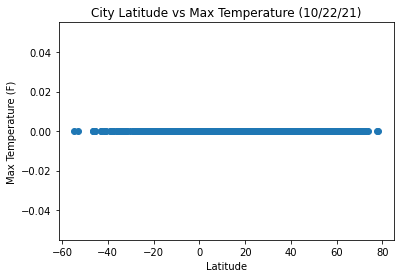

<Figure size 432x288 with 0 Axes>

In [16]:
values = clean_city_data

#Create Scatter Plot
x_values = values["Lat"].values
y_values = values["Max Temp"].values
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (10/22/21)")
plt.show()

#Save file as png
plt.savefig('LatitudevsTemperatureplot.png')

## Latitude vs. Humidity Plot

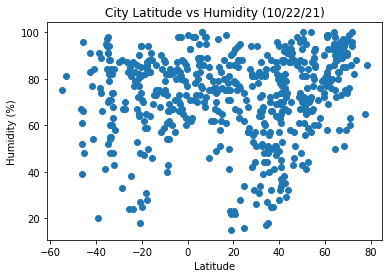

<Figure size 432x288 with 0 Axes>

In [17]:
values = clean_city_data

#Create Scatter Plot
x_values = values["Lat"].values
y_values = values["Humidity"].values
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (10/22/21)")
plt.show()

#Save file as png
plt.savefig('LatitudevsHumidityplot.png')

## Latitude vs. Cloudiness Plot

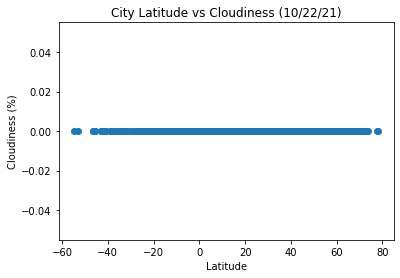

<Figure size 432x288 with 0 Axes>

In [18]:
values = clean_city_data

#Create Scatter Plot
x_values = values["Lat"].values
y_values = values["Cloudiness"].values
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (10/22/21)")
plt.show()

#Save file as png
plt.savefig('LatitudevsCloudinessplot.png')

## Latitude vs. Wind Speed Plot

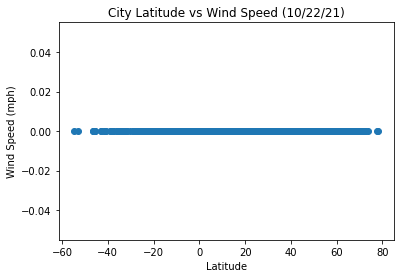

<Figure size 432x288 with 0 Axes>

In [19]:
values = clean_city_data

#Create Scatter Plot
x_values = values["Lat"].values
y_values = values["Wind Speed"].values
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (10/22/21)")
plt.show()

#Save file as png
plt.savefig('LatitudevsWindSpeedplot.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.0


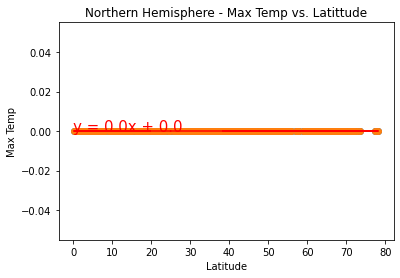

<Figure size 432x288 with 0 Axes>

In [24]:
north_data_df=clean_city_data[(clean_city_data["Lat"]>0)]

values = north_data_df

#Create Scatter Plot
x_values = values["Lat"].values
y_values = values["Max Temp"].values
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latittude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

#Print the r-sqared value
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Save file as png
plt.savefig('NorthernHemisphere-MaxTempvsLatitudeplot.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.0


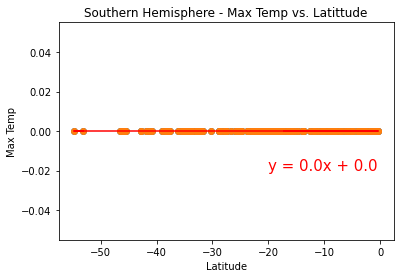

<Figure size 432x288 with 0 Axes>

In [29]:
south_data_df=clean_city_data[(clean_city_data["Lat"]<0)]

values = south_data_df

#Create Scatter Plot
x_values = values["Lat"].values
y_values = values["Max Temp"].values
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latittude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-0.02),fontsize=15,color="red")

#Print the r-sqared value
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Save file as png
plt.savefig('SouthernHemisphere-MaxTempvsLatitudeplot.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02319090505206406


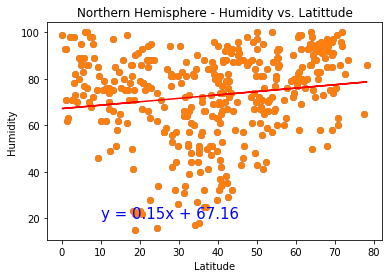

<Figure size 432x288 with 0 Axes>

In [34]:
north_data_df=clean_city_data[(clean_city_data["Lat"]>0)]

values = north_data_df

#Create Scatter Plot
x_values = values["Lat"].values
y_values = values["Humidity"].values
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Humidity vs. Latittude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="blue")

#Print the r-sqared value
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Save file as png
plt.savefig('NorthernHemisphere-HumidityvsLatitudeplot.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004810299295965532


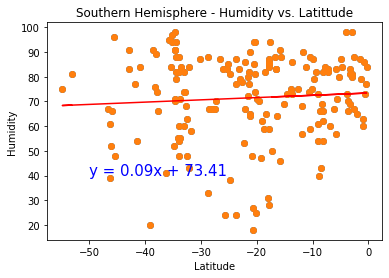

<Figure size 432x288 with 0 Axes>

In [33]:
south_data_df=clean_city_data[(clean_city_data["Lat"]<0)]

values = south_data_df

#Create Scatter Plot
x_values = values["Lat"].values
y_values = values["Humidity"].values
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Humidity vs. Latittude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 40),fontsize=15,color="blue")

#Print the r-sqared value
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Save file as png
plt.savefig('SouthernHemisphere-HumidityvsLatitudeplot.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


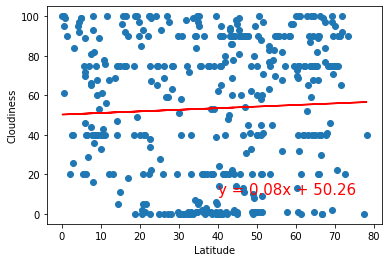

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


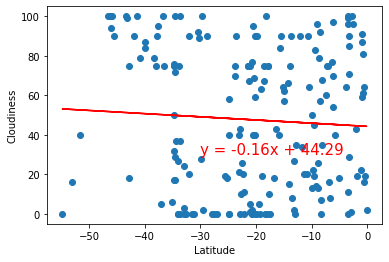

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


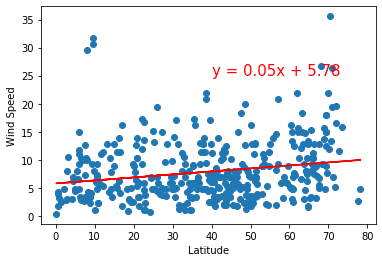

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


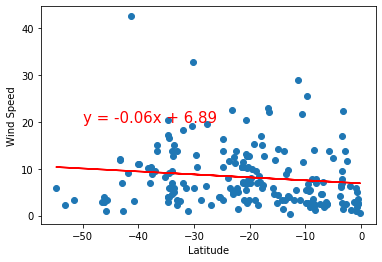